# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

### Задачи: 
1) Приоритизировать гипотезы, 

2) Запустить A/B-тест,

3) Проанализировать результаты.

### Исходные данные:


**Данные для первой части:** 

*Файл: /datasets/hypothesis.csv*
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

*Файл: /datasets/orders.csv*

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

*Файл: /datasets/visitors.csv*

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План выполнения проекта:


<a href='#step_1'>Часть 1. Приоритизация гипотез </a>
<ul>
    <li>
        <a href='#step_1.1'>1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета</a>
    </li>
    <li>
        <a href='#step_1.2'>2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета</a>
    </li>
    <li>  
        <a href='#step_1.3'>3. Определим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло?</a>
    </li>
</ul>

<a href='#step_2'>Часть 2. Анализ A/B-теста</a>
<ul>
    <li>
        <a href='#step_2.1'>1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения</a>
    </li>
    <li>
        <a href='#step_2.2'>2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.3'>3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.4'>4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.5'>5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.6'>6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения </a>
    </li>    <li>
        <a href='#step_2.7'>7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей</a>
    </li>    <li>
        <a href='#step_2.8'>8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.9'>9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов</a>
     </li>    <li>
        <a href='#step_2.10'>10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.11'>11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения</a>
    </li> 
    <li>
        <a href='#step_2.12'>12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения</a>
   </li>    <li>
        <a href='#step_2.13'>13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.</a>
  </li>    <li>
        <a href='#step_2.14'>14. Примим решение по результатам теста и объясним его. </a>
    </li> 
</ul>    
        
<a href='#step_3'>3. Выводы</a>

## Подготовка данных

In [1]:
# импортируем библиотеки и модули, необходимые для выполнения работы
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import seaborn as sns # импортируем библиотеку seaborn
from matplotlib import pyplot as plt # импортируем модуль pyplot из matplotlib
import datetime as dt # импортируем модуль datetime
import scipy.stats as stats # импортируем модуль scipy.stats

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедитемся, что тип данных в каждой колонке — правильный.

#### 1) Данные с гипотезами:

In [2]:
# прочитаем файл csv и сохраним данные в таблицу hypothesis
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# Получим полные назания списка гипотез
hypothesis.hypothesis.unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

#### 2) Данные о заказах:

In [6]:
# прочитаем файл csv и сохраним данные в таблицу orders
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### 3) Данные о пользователях:

In [8]:
# прочитаем файл csv и сохраним данные в таблицу visitors
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<a id='step_1'></a>

## Часть 1. Приоритизация гипотез

<a id='step_1.1'></a>
### 1.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [10]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).map(lambda x:x)
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


**Вывод:**

Наиболее перспективные гипотезы по параметру **ICE**:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

<a id='step_1.2'></a>
### 1.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [11]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).map(lambda x:x)
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:**

Наиболее перспективные гипотезы по параметру **RICE**:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

<a id='step_1.3'></a>
### 1.3. Определим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло?

В отличии от ICE параметр RICE учитывает reach - охват пользователей и соответственно учитывает скольких пользователей затронет изменение.
Наиболее перспективные гипотезы по параметрам ICE и RICE отличаются.

Наиболее перспективные гипотезы по параметру **ICE**:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Наиболее перспективные гипотезы по параметру **RICE**:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

На первом месте по параметру RICE оказалась гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** (по параметру ICE данная гипотеза на третьем месте). Высокое значение RICE достигается за счет наибольшого значения reach по сравнению с остальными гипотезами, а также достаточно высокими значениями impact и confidence, при относительно невысоком значении efforts. Таким образом, эта гипотеза затронет максимальное количество пользователей.

На втором месте по параметру RICE гипотеза **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** (по параметру ICE данная гипотеза всего лишь на пятом месте). Эта гипотеза также имеет высокие значений reach и confidence. Затраты, чтобы протестировать эту гипотезу небольшие (efforts = 3 по 10-бальной шкале).

На третьем месте по параметру RICE гипотеза **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** (по параметру ICE данная гипотеза на втором месте). Эта гипотеза также имеет высокие значений impact и confidence, но относительно небольшое значение reach (т.е. затронет небольшое количество пользователей). Также затраты, чтобы протестировать эту гипотезу, выше среднего (efforts = 6 по 10-бальной шкале).

На четвертом месте по параметру RICE гипотеза **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"** (по параметру ICE данная гипотеза также на четвером месте, но значения ICE значительно ниже, чем у первых ТОП-3 гипотез по ICE). Эта гипотеза также имеет высокие значений confidence и среднее значение reach=5, но низкие значение impact. Затраты, чтобы протестировать эту гипотезу небольшие (efforts = 3 по 10-бальной шкале).


<a id='step_1'></a>

## Часть 2. Анализ A/B-теста

<a id='step_2.1'></a>
### 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

In [12]:
# Применим метод dt.strftime() — он превращает объект Series с типом datetime в строку в формате даты:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# создаем массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates()

# Получим агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Получим агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим обе таблицы в одной и переименуем названиями столбцов:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

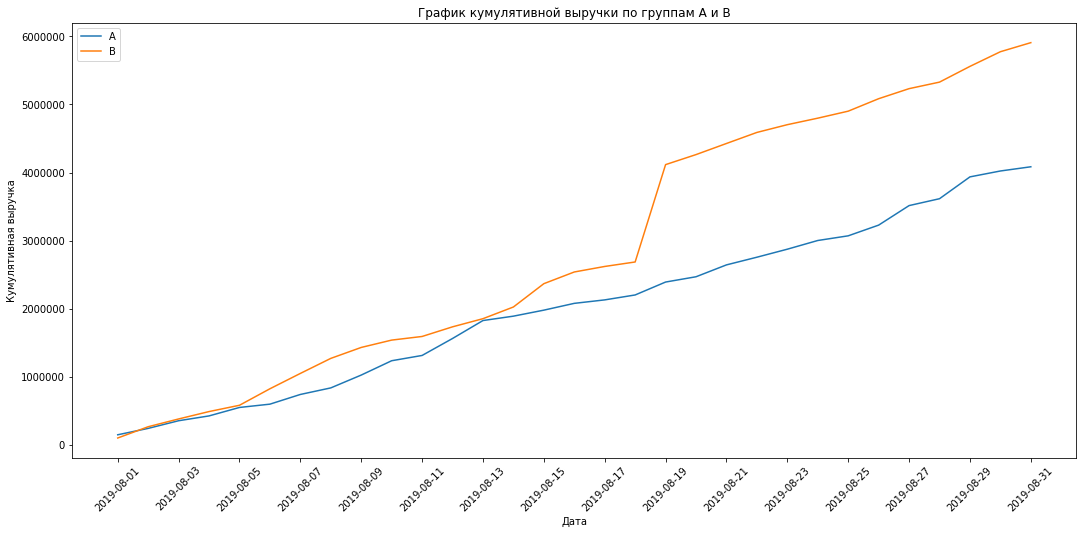

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Зададим размер графика
plt.figure(figsize=(18,8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + \
                     pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45);

plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка');

**Вывод:**

Построили график кумулятивной выручки по группам А и В.

Выручка группы А почти равномерно увеличивается в течение всего теста.Выручка группы В также в течение времени увеличивается, но имеет резкий скачек 19 августа 2019. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<a id='step_2.2'></a>
### 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

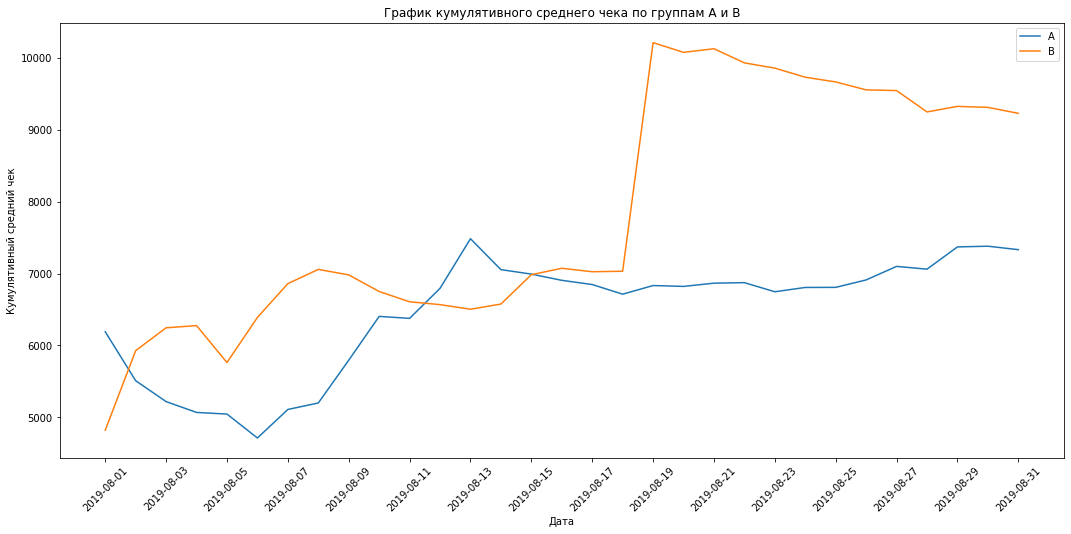

In [15]:
# Зададим размер графика
plt.figure(figsize=(18,8))

# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + \
                     pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45);

plt.title('График кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек');

**Вывод:**

Построили график кумулятивного среднего чека по группам А и В.

Средний чек группы А сначала падал, потом рос и к середине теста установился.

Средний чек группы В вначале теста очень сильно калебался, а в середине теста был резкий всплекс на графике, после чего средний чек группы В продолжал падать. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике - 19 августа 2019 г.).

<a id='step_2.3'></a>
### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

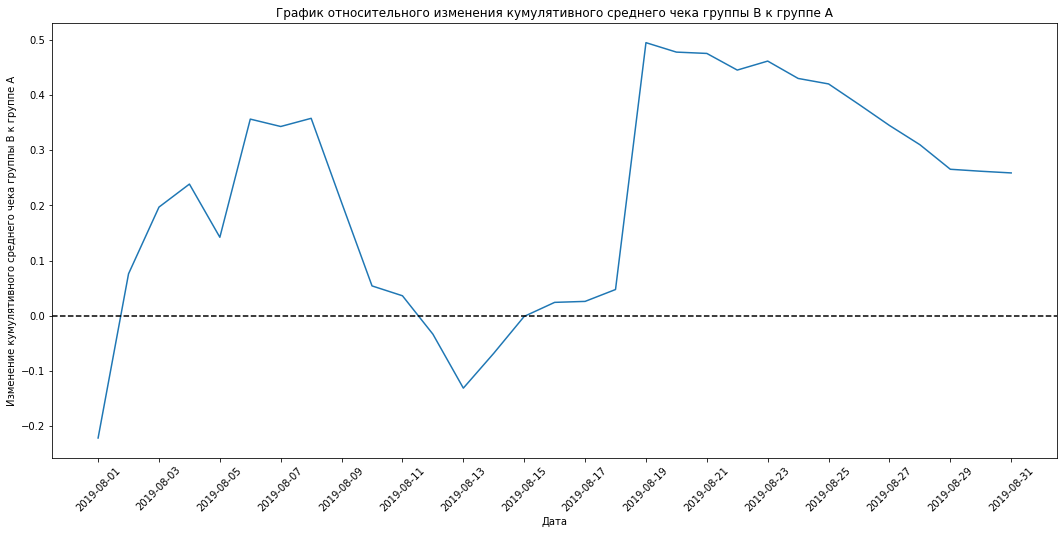

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Зададим размер графика
plt.figure(figsize=(18,8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + \
                     pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45);

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека группы B к группе A');

**Выводы:**

Построили график относительного изменения кумулятивного среднего чека группы B к группе A. Из графика видно, что результаты теста значительно и резко менялись. Видимо, именно тогда были совершены аномальные заказы.

<a id='step_2.4'></a>
### 4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения

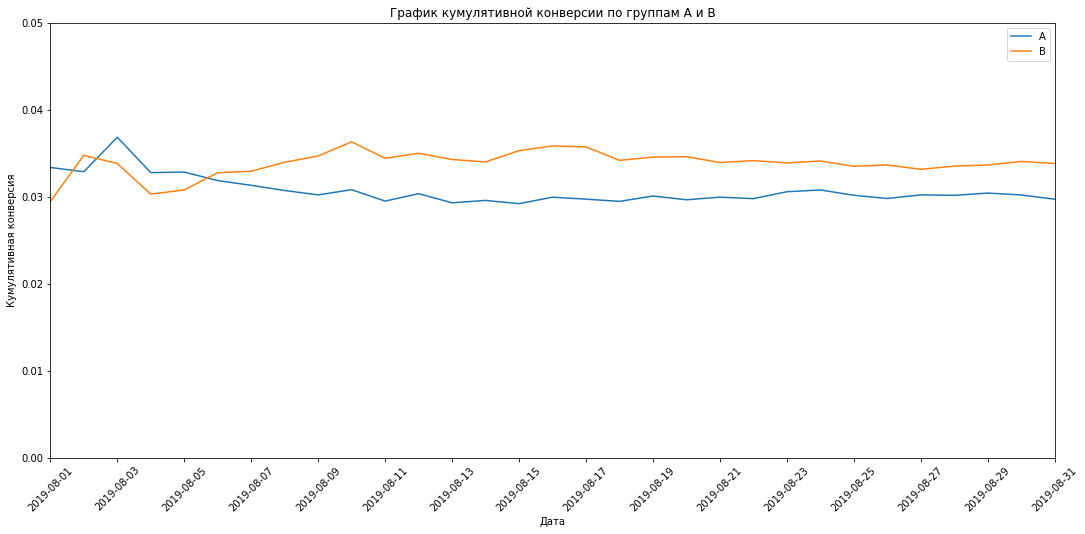

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Зададим размер графика
plt.figure(figsize=(18,8))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

plt.xticks(np.arange(cumulativeDataA['date'].min(), cumulativeDataA['date'].max() + \
                     pd.to_timedelta('1 day'), pd.to_timedelta('2 day')), rotation = 45);

plt.title('График кумулятивной конверсии по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

**Вывод:**

Построили график кумулятивной конверсии по группам А и В.

В самом начале теста группа А имела большую коныерсию, затем были колебания конверсии (стала больше для группы В, затем снова для группы А). После 6 августа 2019 г. конверсия группы В вырвалась вперёд и затем зафиксировалась, а конверсия группы А просела и также зафиксировалась.

<a id='step_2.5'></a>
### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения

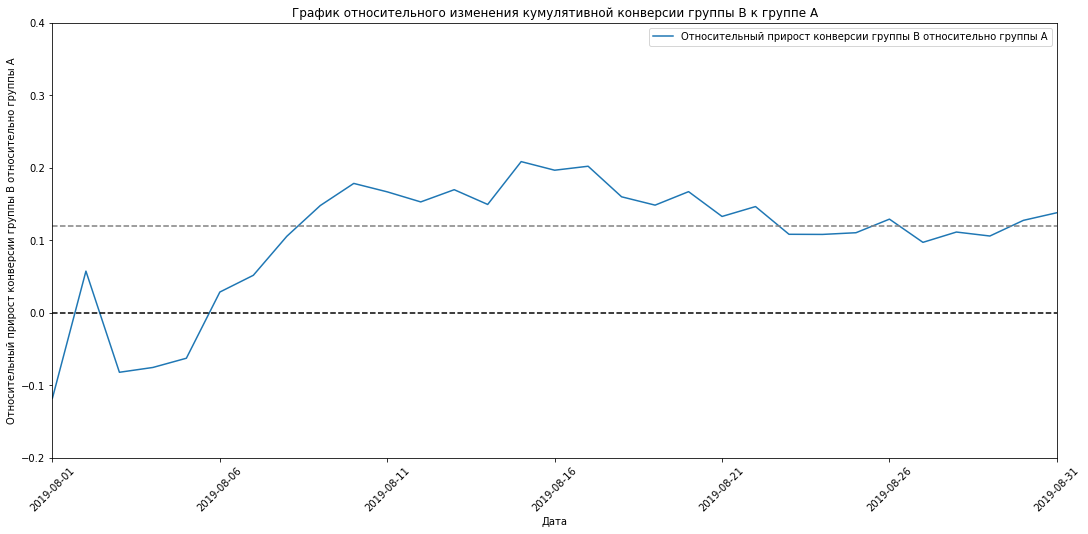

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                                           left_on='date', right_on='date', how='left', \
                                                                           suffixes=['A', 'B'])
# Зададим размер графика
plt.figure(figsize=(18,8))

# строим графики
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4]);

plt.xticks(np.arange(mergedCumulativeConversions['date'].min(), mergedCumulativeConversions['date'].max() + \
                     pd.to_timedelta('1 day'), pd.to_timedelta('5 day')), rotation = 45);

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии группы B относительно группы A');

**Выводы:**

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом конверсия группы В снова резко упала, затем был резкий рост. Далее на протяжении всего теста группа В выигрывала, но продолжала колебаться. В целом, отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 

Следующим шагом стоит проанализировать аномалии, возможно, они изменят картину.

<a id='step_2.6'></a>
### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

In [20]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


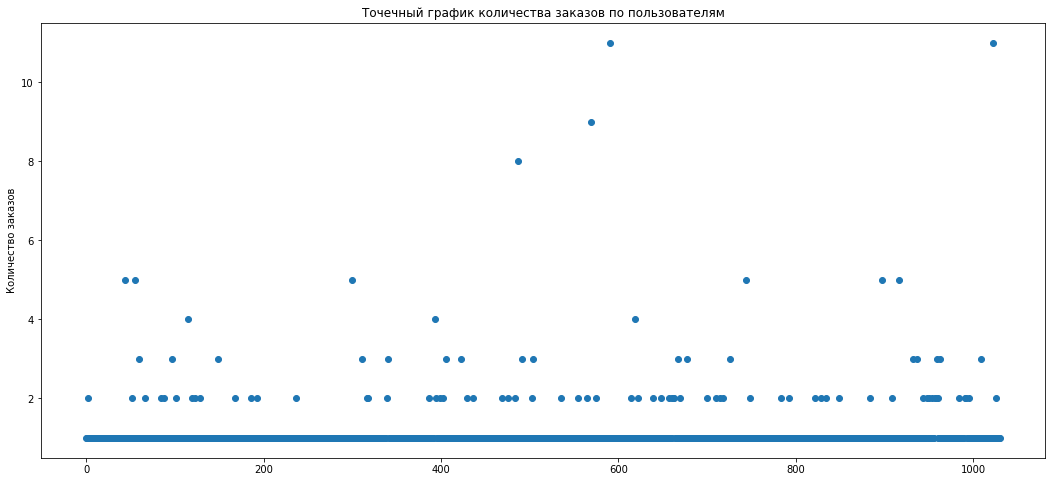

In [21]:
# Зададим размер графика
plt.figure(figsize=(18,8))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

**Вывод:**

Построили точечный график количества заказов по пользователям.

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

Для определения, что считать аномальным количеством заказов, посчитаем следующим шагом 95й и 99й перцентили количества заказов на одного пользователя. 

<a id='step_2.7'></a>
### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:**

95-й и 99-й перцентили количества заказов равны 2 и 4 соответственно.

Не более 5% пользователей сделали больше 2 заказов и не более 1% пользователей - больше 4 заказов.
Количество заказов больше 3х будем считать аномальными значениями (так мы удерем от 1% до 5% аномальных значений).

<a id='step_2.8'></a>
### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

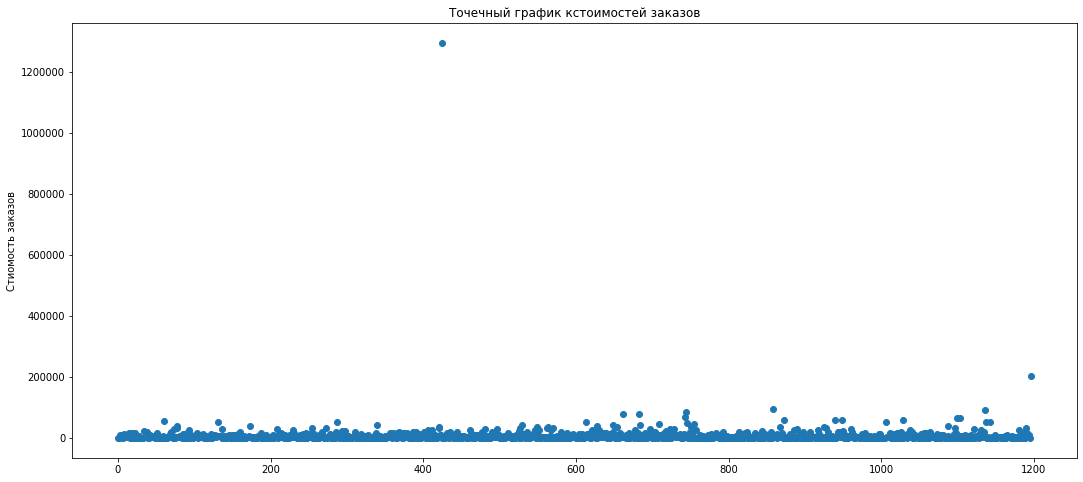

In [23]:
# Зададим размер графика
plt.figure(figsize=(18,8))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

plt.title('Точечный график кстоимостей заказов')
plt.ylabel('Стиомость заказов');

**Выводы:**

Есть один очень дорогой заказ, а ткже немного дорогих заказов. По графику сложно выбрать границу аномальных заказов, на первый вггляд это значение больше 50 000 рублей. 

Для определения, что считать аномальной стоимостью заказов, посчитаем следующим шагом 95й и 99й перцентили стоимости заказов. 

<a id='step_2.9'></a>
### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Выводы:**

95-й и 99-й перцентили стоимости заказов равны 28000 и 58233.2 соответственно.

Не более чем у 5% заказов чек больше 28000, и не более чем у 1% заказов - больше чем 58233.2.

Стоимость заказов больше 35000 будем считать аномальными значениями, так мы уберем от 1% до 5% аномальных значений.

<a id='step_2.10'></a>
### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения

In [25]:
# Найдем количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Найдем оличество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Найдем количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Найдем количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Найдем количество заказов и суммарную выручку в выбранную дату в группе A
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Найдем суммарное число заказов и суммарную выручку до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# Найдем количество заказов и суммарнцую выручку в выбранную дату в группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Найдем суммарное число заказов и суммарную выручку до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Объеденим данные в общую таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


*Примечание:*

Названия столбцов данных, полученной таблицы:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [26]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [27]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat([ordersByUsersA['orders'],\
          pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],\
          pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Примените тест Манна-Уитни. Выведите p-value для сравнения конверсии между группами. 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Посчитаем статистическую значимость различия в конверсии между группами
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/\
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.008
0.138


**Вывод:**

Значение p-value = 0.008, что значительно меньше 0,05, поэтому нулевую гипотезу, о том, что статистически значимых различий в конверсии между группами нет, **отвергаем**. 

Анализ "сырых" данных показал, что в конверсии между группами А и В есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%

<a id='step_2.11'></a>
### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

In [28]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, 
# передадим критерию mannwhitneyu() данные о выручке с заказов

print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


**Вывод:**

Значение p-value равно 0.365 и значительно больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет, **не отвергаем**.

Анализ Анализ "сырых" данных показал, что статистически значимых различий в среднем чеке между группами А и В нет.
Средний чек группы B значительно выше среднего чека группы A (больше на 25,9%).

<a id='step_2.12'></a>
### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения

Примем за аномальных пользователей тех, кто совершил больше 3 заказов или совершил заказ дороже 35000 рублей. 

In [29]:
# Сделаем срезы пользователей с числом заказов больше 3
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis = 0)

# Сделаем срезы пользователей, совершивших заказы дороже 35000
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']

#  Объединим данные в таблице abnormalUsers
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

# Узнаем, сколько всего аномальных пользователей методом shape()
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64
(42,)


В данных 42 аномальных пользователя.

In [30]:
# Создадим переменные sampleAFiltered и sampleBFiltered, 
# в которых сохраним очищенные данные о заказах — не включая аномальных пользователей

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                                       name='orders')],axis=0)

In [31]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
# Выведим p-value для сравнения конверсии между очищенными группами:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# Выведим относительный прирост конверсии очищенной группы B, округлив до трёх знаков после запятой.
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.155


**Вывод:**

Значение p-value по "очищенным данным" равно 0.007, что значительно меньше 0.05, поэтому нулевую гипотезу, о том, что статистически значимых различий в конверсии между группами нет, **отвергаем**. 

Как и с "сырыми" данными конверсии между группами А и В есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А по "очищенным" данным равен 15.5%   

<a id='step_2.13'></a>
### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

In [32]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.437
0.025


**Вывод:**

Значение p-value по "очищенным данным" равно 0.437, что значительно больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет, **не отвергаем**.

Как и с "сырыми" данными в "очищенных" данных статистически значимых различий в среднем чеке между группами А и В нет. А вот относительный прирост среднего чека группы В к среднему чеку группы А по "очищенным данным" значительно сократился и составляет 2.5%. 

Т.е., выбросы в среднем чеке очень сильно смещали среднюю оценку. И если по "сырым" данным группа B была заметно лучше, то после того, как удалили выбросы, уже **нельзя** сказать, что относительный прирост среднего чека группы В лучше, чем у группы А. 

<a id='step_2.14'></a>
### 14. Примем решение по результатам теста и объясним его.

По результатам A/B тест получили следующие результаты:

* Есть статистически значимые различия по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Относительный прирост конверсии группы В к конверсии группы А по "очищенным" данным равен 15,5% (по "сырым" данным - 13,8%);

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Относительный прирост среднего чека группы В к среднему чеку группы А по "очищенным данным" значительно сократился и составляет 2.5% (по сырым данным - 25,9%);

* График различия конверсии между группами показал, что результаты группы B лучше группы A: имеют тенденцию к росту, но отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

* График различия среднего чека сильно колеблется, в данных есть аномальные значения. Сделать из этого графика определённые выводы нельзя.


Таким образом, зафиксировать победу одной из групп или отсутствие различий между группами мы не можем.

**Решение: Остановить тест, зафиксировать отсутствие различий между группами.**